In [5]:
# -*- coding: utf-8 -*-
"""
Created on Wed May 22 22:18:32 2024

@author: mrsag
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import matplotlib as mpl

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12
#mpl.rcParams['font.weight'] = 'bold'
#mpl.rcParams['font.style'] = 'italic'  # Set this to 'italic'
mpl.rcParams['figure.dpi'] = 120  # highres display


In [6]:
def polynomial_fit(x,y,degree):
    ''' Will take two 1 d arrays x and y and the required degree of 
    fitting and will return the fitted curve along with the fitting coefficients.
    
    y = c0 + c1*x + c2*x**2 + c3*x**3 + ...
    
    the return will be y_predict curve and coefficient array: [c0,c1,c2,c3,...]'''
    
    x = x[:,np.newaxis]
    y = y[:,np.newaxis]

    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression(fit_intercept=False))

    # Train the model using the training sets
    model.fit(x, y)

    # Make predictions using the testing set
    y_predict = model.predict(x)
    
    # Access the linear regression model within the pipeline
    linear_reg_model = model.named_steps['linearregression']
    
    return y_predict.flatten(), (linear_reg_model.coef_).flatten()

In [14]:
@np.vectorize
def f(x):
    coeff=(0.01,-0.1,1,-10,100)
    return np.polyval(coeff,x)*np.tan(np.cos(x))

@np.vectorize
def g(x):
    return np.tan(x)

[ 1.41768500e+02 -1.74634667e+01 -7.07813820e+01  8.06614130e+00
  5.46061038e+00 -6.35397117e-01 -1.54756629e-01  1.89077215e-02
  2.09658701e-03 -2.69805096e-04 -1.43373822e-05  1.90839480e-06
  4.04737506e-08 -5.42556922e-09]


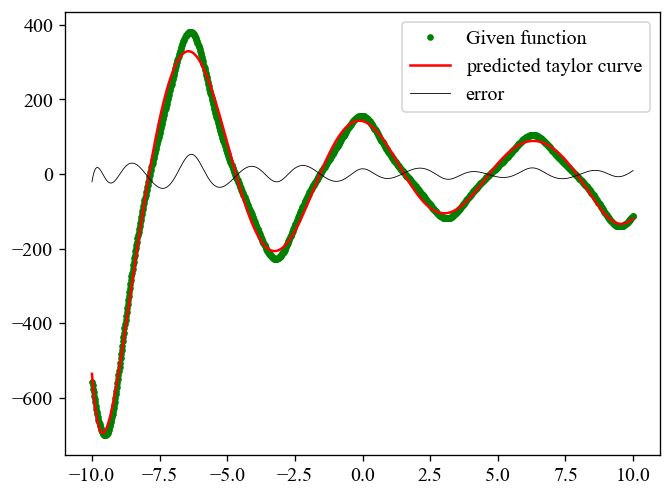

In [18]:
x = np.linspace(-10,10,1001)
y = f(x)

degree = 13

y_predict, coefficients = polynomial_fit(x, y, degree)

print(coefficients)


plt.plot(x,y,'go', label="Given function", markersize=3)
plt.plot(x,y_predict,'r-',label="predicted taylor curve")
plt.plot(x,(y-y_predict),'k-',lw=0.5, label="error")
plt.legend()
plt.show()